In [1]:
author <- 'Ola Olagunju'
email <- 'gunjujide@gmail.com'

# Calculating the Limit of Stokesian Settling in Wastewater

## 1. Summary
In wastewater treatment, clarifiers are critical to maintain clear effluent. **The limit of stokesian settling (LOSS) parameter measures the total suspended solids (TSS) concentration at which clarifier failures occur.** LOSS characterizes a wastewater transition from a faster settling or flocculent regime to a slower or hindered regime. A limitation in measurement of LOSS was visual subjectivity. 

In this project, three methods employing grayscale image data were introduced for measuring LOSS. They used simple linear regression, sigmoid fitting, noise (standard deviations in grayscale index) respectively and were tested for consistency in changing light exposure settings, settling time and sludge quality. Light exposure impacted the measurements at very bright settings, by decreasing the sensitivity of calculations, while longer settling times for taking measurements (> 50 s) also reduced the sensitivity. **Noise (light dispersion in the wastewater) calculations provided the least variability in LOSS from the methods, and was promising to use as a metric for LOSS.**

## 2. Introduction
Good settling sludge is essential in this step, to maintain effluent quality limits and consequently increase the amount of recyclable biomass back into the treatment system. Therefore, well operating clarifiers are important in treatment plants to ensure they serve as good sludge storage zones – to store sludge during peak flow and, as clarifiers – to provide low TSS supernatant (Ekama and Gunthert 1997; Da Motta et al. 2002). 

However, clarifiers can fail in two ways when their capacities are surpassed (Ekama and Marais 2002). Firstly, solids loading rate (SLR) failures due to the incoming solids exceeding the downward solids flux, resulting in a marginal upwards flux and an increase in solids in the supernatant. Secondly, surface overflow rate (SOR) failures due to particle settling velocities of incoming solids being lower than the overflow rate and as a result, higher TSS in the supernatant.


According to Stokes law, settling velocity of individual particle spheres is directly proportional to particle density and diameter, thus, larger and heavier particles will have higher settling velocities. However, Stokes law may fail to hold in actual clarifiers where, the settling velocity of particles may not increase due to limitations in particle collisions, interaction between particles (i.e. flocculation), density and surface area of flocs being formed (Magara et al. 1976). Flocculent settling obeys Stokes law and a transition to hindered settling means a reduction in settling velocity (slower settling), and thus disobeys Stokes law. **Hindered settling is a precursor of SLR failure in clarifiers and it is useful to be able to determine if a sludge matrix is hindered or approaching hindered settling (Mancell-Egala et al. 2016).**

Numerous studies have been done using image analysis to correlate with settling indexes (Grijspeerdt and Verstraete et al. 1997; Liwarska-Bizukojc 2005; Jenne et al. 2007; Derlon et al. 2017). But, these studies focus on aspects of the settling sludge like the sludge bed height and individual settling particles, and do not consider the entire settling profile in hindered or flocculent settling sludge. 

Currently, two methods are typically used to determine sludge settling quality: Sludge Volume Index (SVI) and Flux curves. A flux curve plots a solids flux curve against solids concentration, with the solids flux curve calculated from initial settling velocities of a range of solids concentrations (Wahlberg and Keinath 1988). The SVI experiment however, utilizes only one solids concentration and is typically carried out in 30 minutes.


The limitations for both lie in that the flux curve requires at least five concentrations and takes hours to complete, and that SVI does not consistently correlate with measured settling velocities, compression characteristics, or rheological characteristics (Dick and Vesilind 1969; Daigger and Roper 1985; Ekama and Marais 1986). This limits the SVI from being a consistent metric for settling and estimating clarifier failures.

#### I. Defining  the Limit of Stokesian Settling (LOSS)
Despite time limitations on flux curves, flux models have shown good correlation with settling characteristics. One such model, expanded by Takacs et al. (1991), which is based on particle settling velocity predicts settling velocity over the entire solids concentration. In the model, the four regions are: non-settleable solids, discrete settling, flocculent settling, and hindered (non-stokesian) or compression settling (Fig. 1). The area under the curve is a representation of settling sludge quality. The larger the area the better the sludge settling quality. Hence, **the solids concentration at the transition from region 3 to 4 in the model signifies a flocculent (stokesian) to hindered (non-stokesian) change.**

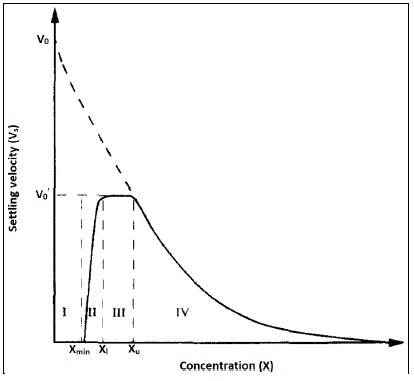

| |*Fig. 1 Takacs et al., 1991 settling velocity model. X is the solids concentration in mg TSS/L, Xmin is the minimum attainable suspended solids concentration in g/m3, Xl is the lower concentration of region III, Xu is the upper concentration of region III, Vo is the maximum settling velocity in m/d.*| |
|:--- |:----:| ---:|

**This solids concentration that signifies a flocculent (stokesian) to hindered (non-stokesian) change is the Limit of Stokesian Settling (LOSS). It is useful as a sludge quality parameter to help estimate the capacity of a clarifier (Mancell-Egala et al., 2016).** This method can be an alternative to clarifier stress tests which take considerably longer to perform (Patoczka et al 1998; Murray et al 2013; Chu et al 2015). 

The LOSS can be defined as the MLSS concentration in the feed well of a clarifier at which SLR or SOR failure occurs. **In field applications, the MLSS of the activated sludge going into the feed zone of the clarifier should be lower than the LOSS concentration to avoid SLR or SOR failures.**

### II. Significance of this Project
LOSS in wastewater treatment was discussed by Mancell-Egala et al. (2016), who used video analysis of sludge settling in a jar, then based on an RGB MATLAB program, indicated LOSS as the flocculent concentration when the red color intensity of the settling sludge changed less than 10 units in a 2-cm depth in the jar. The visual approach to determine LOSS by Mancell-Egala et al. (2016) required experimental observations to determine the hindered to flocculent transition. These initial methods were useful in determining LOSS values, but in practice, several issues arose when adopting the methods.

First, changes in light exposure were not accounted for, which introduced error in the measurement. Also, the LOSS calculations were not done with a standardized settling time, which is especially important for faster settling sludge. Finally, the 10 units/2 cm LOSS threshold had no backing for use in an entire settling profile since 2 cm was subjective to the sludge type being used, may have been affected by the noise in the slope (Fig. 2), had no consistent region where the slopes were calculated and was not standardized for the time of settling or the light intensity (exposure) at the time of the experiment. Hence, the method was still susceptible to be interpreted differently by different operators.

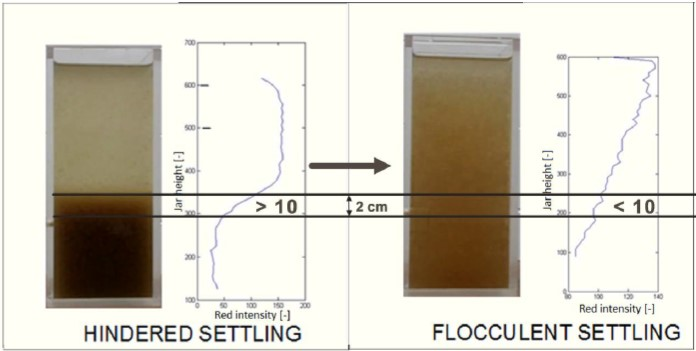

| |*Fig. 2 Determination of LOSS from Mancell-Egala 2016*| |
|:--- |:----:| ---:|

Also, in the visual LOSS determination, the human interpretation of settling characteristics makes the method too subjective, since the operator’s vision may sometimes not be fast and sharp enough to determine the LOSS transition or settling profile changes (Amaral and Ferreira. 2005; Stricker et al. 2007; Kim et al. 2011; Derlon et al. 2017). **Hence, using the LOSS values from the current methods of LOSS calculation, clarifiers cannot be designed to yield good effluent quality.** In this project, we aim to introduce new methods of calculating LOSS that are reliable for operators. 

## 3. Data Collection
### I. Sample Location and Wastewater Characteristics
This study was carried out using wastewater from the Blue Plains Advanced Wastewater Treatment Plant (AWWTP) in Washington, DC, USA. Blue Plains treats about 1.45 × 10^6 m3/d of raw wastewater, originating from Washington DC, and surrounding parts of Maryland and Virginia. Samples collected for experiments were from their secondary and biological nutrient removal (BNR) stages. Secondary and BNR were chosen to test LOSS because of the difference in settling quality between them. BNR has better flocculating sludge than secondary primarily due to longer solids retention time (~20 days), which enables bacteria communities in the wastewater to produce denser flocs (Lee et al. 2003, Masse et al. 2006). Whereas, lighter flocs with lower settling velocities in secondary systems settle slower, so it was advantageous to use both sludge systems to develop a robust method of calculating the LOSS, that was independent of sludge quality.

Table 1 shows the type of samples collected, clarifier operation and weekly averages of the sludge characteristics gathered from plant data. Previous sampling data collected from Blue Plains (Mancell-Egala et al. 2016) was also included. The difference in the two secondary channels were their influent characteristics, and reactor configuration. All samples were collected at the end of the reactor passes, at a channel before being fed to the clarifiers. The samples were collected using a bucket, instead of a pump to avoid shearing of flocs. At least 60 L of samples were collected for each trial. SVI30 measurements for each sludge was not done at a consistent mixed liquor concentration except noted. Mancell-Egala et al., 2016 notes that SVI30 measurements which are not done at the same concentration and above 3500 mg TSS/L, were not comparable due to inability of the SVI30 to adjust for small changes in sludge settling characteristics (Bye and Dold., 1998). ISV’s were also not comparable as they were not measured at a consistent concentration. Hence, effluent quality was used as the metric to judge poor settling sludge from good settling sludge.

Despite all the clarifier SOR’s and SLR’s for each sampling location being within conventional design ranges (SOR between 0.7 and 1.5; SLR < 150), samples A1, A2 and B1 resulted in poor effluent quality in the clarifiers, while samples C (nitrification) and sample B2 (secondary) had good effluent quality (< 30 mg TSS/L). This was due to poorly settling (slower) activated sludge for A1, A2 and B1 and reasonably faster settling sludge for B2 and C during the sampling period. Samples A1, A2 and B1 had murky sludge, due to high colloidal COD (chemical oxygen demand) content in the wastewater (about 100 mg COD/L during this period, but usually < 50 mg COD/L in secondary treatment). This made the supernatant turbid and with a tinted instead of clear supernatant, as evidenced by the poor effluent quality in the clarifiers of 56, 59 and 73 mgTSS/L.

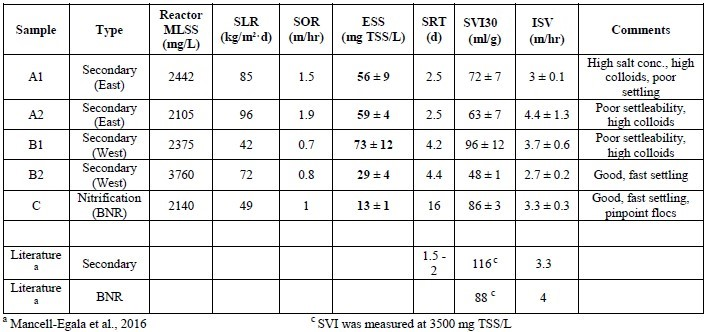

| |*Table 1. Wastewater and clarifier characteristics of samples taken from the Blue Plains AWWTP*| |
|:--- |:----:| ---:|


### II. Visual LOSS Experimental Procedure
Sludge was first collected from the reactor and when the initial sludge sample did not exhibit hindered settling at the reactor MLSS, then it was concentrated to an MLSS were hindered settling was evident. Subsequently, dilutions of this MLSS concentration were each made in a 2 L Fisher Scientific™ Nalgene™ Settleometer (made from clear polycarbonate), ranging from hindered to flocculent concentrations. These dilutions were determined during the experiment. Consequently, a polypropylene paddle was first used to stir the dilution, then later stop vortexes forming and prevent radial motion in the Settleometer. The stirring paddle was then removed and the settling profile for each dilution was visually observed. If an interface existed, the sludge was still in the hindered profile, but if an interface had been absent, then that dilution was considered the LOSS concentration. TSS of the that dilution was then measured using the protocols from Standard Methods (APHA 1997).

### III. Calculated LOSS Experimental Procedure
This procedure followed the same concept as the visual LOSS, but with a few changes. For taking pictures of sludge settling, a Canon® EOS Rebel T3i digital SLR camera was used. The pictures were taken in full color HD, at 72 dpi and 3456 by 5184 pixels. The camera was set 0.6 m away from the settling jar. The light source used was a LED light pad. A detailed diagram of the experimental setup can be seen in Fig. 3. Mixing was done in a jar test apparatus, at 100 rpm (1.5 G) for 10 minutes. This was done to ensure all the flocs had formed at steady-state conditions (Jung et al. 1996; Wang et al. 2011) before settling. Then the mixing was stopped and the sludge was carefully baffled with a stirring paddle to halt fluid motion radially. After the sludge seemingly became still, the paddle was removed and the settleometer was placed between the LED light pad and the camera. Pictures were taken at subsequent time intervals, and light intensities or exposure settings were controlled digitally in the camera. This experiment was also done in a dark room to control light intensity in the images.

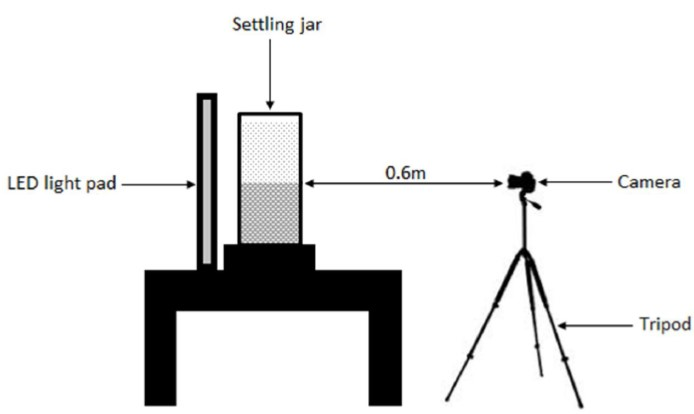

| |*Fig. 3 View of experimental setup*| |
|:--- |:----:| ---:|

### IV. Light Intensity and Settling Time Settings
Six light intensity settings were tested for each sample, shown in Table 2. Light intensity is the amount of light that reaches the photographic sensor of the camera and is determined by shutter speed, lens aperture and ISO speed (Johnson 2003). The light intensity showed how dark (low exposure) or bright (high exposure) the camera was when capturing images and could be ex-pressed in terms of the median intensity of a brightness histogram. An overexposed image resulted in the histogram leaning to the right and a higher light intensity, while an underexposed image resulted in the histogram leaning to the left and a lower light intensity (Nourani-Vatani, N. and Roberts, J.M. 2007). The settling times used for analysis were 0 to 90 s, with an interval of 10 seconds each. ‘0’ second denotes the initial image capture of the settling sludge after orthokinetic mixing for 10 mins and stabilization. To ensure consistency and avoid delays, a camera timer was used to take pictures. Significant differences in the LOSS calculated between different thresholds were done using ANOVA tests (normal data) and Kruskal-Wallis tests (non-normal data). Normality was measured using the Shapiro-Wilk test. Mann Whitney U tests were also used to compare different LOSS values of the methods.

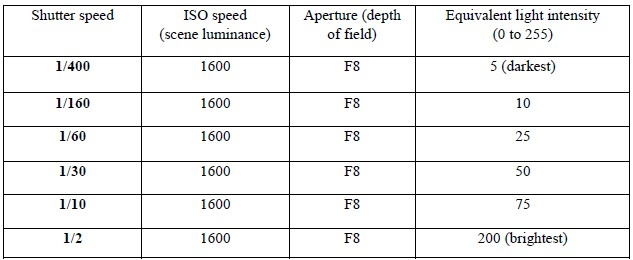

| |*Table 2. Camera settings used to determine light intensity*| |
|:--- |:----:| ---:|

## 4. Data Exploration
### I. Viewing the three methods of LOSS Determination
Using ImageJ™, the pictures were converted to grayscale images. Due to wastewater color, previous studies have used the red or blue color channel in image analysis (Liwarska-Bizukojc 2005; Derlon et al. 2017), however grayscale was used in this study to remove any color bias in the wastewater. Grayscale intensity range from black (0) to white (255). The intensity values for the grayscale images were then outputted as a text file. Each intensity value was an average of the horizontal intensity values at each vertical pixel point in the Settleometer height. The middle horizontal section (3/4th of the Settleometer width) was used as the average. Darker regions of the sludge (i.e. hindered or compression zones) have lower grayscale values while lighter regions (supernatant) have higher grayscale values (Jenne et al. 2007). These grayscale values were represented a solids profile of the settling sludge in the Settleometer (Fig. 4.). The text files were then used in RStudio™ version 1.1.383 (ran on R™ version 3.4.2) to do mathematical calculations using three models – linear fit, sigmoid fit and noise analysis (Fig. 4.). Mathematical parameters were derived from the grayscale profile of each image and used for calculations.

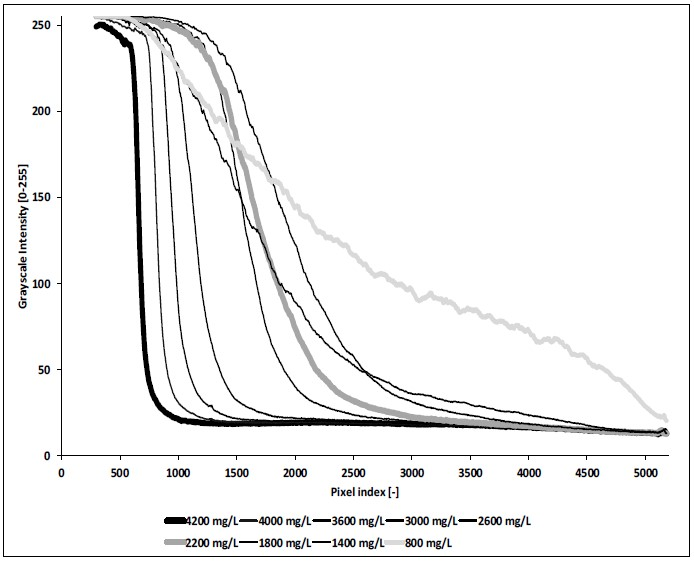

| |*Grayscale profiles from hindered (4200 mg/L) to flocculent (800 mg/L) in sample C*| |
|:--- |:----:| ---:|

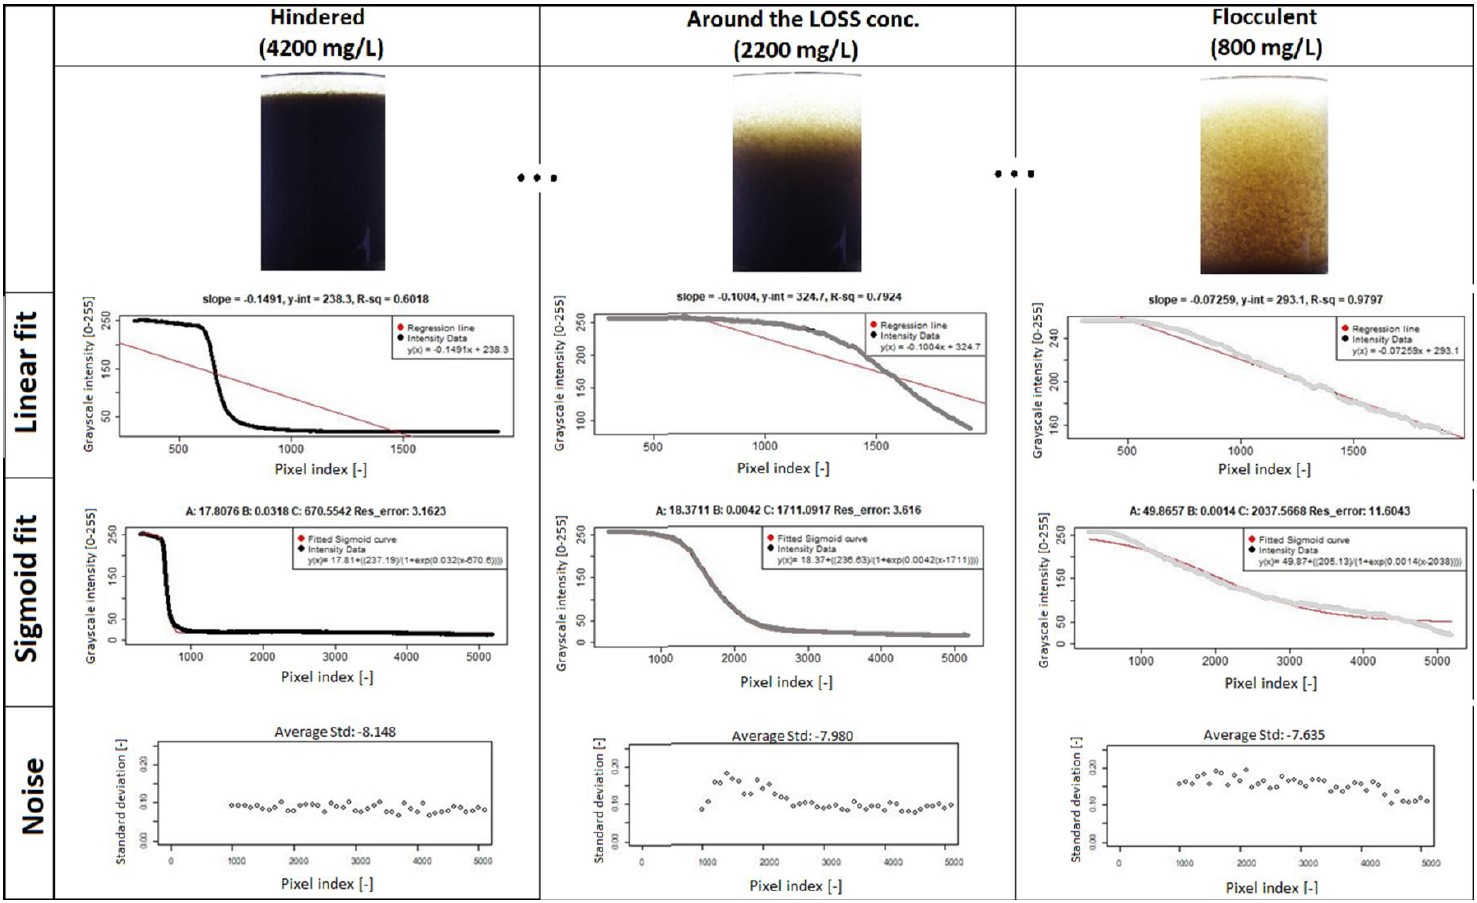

| |*Fig. 5 Sample C. Mathematical techniques in modeling the grayscale intensities of the solids concentration in a: hindered zone, around the LOSS concentration, and flocculent zone*| |
|:--- |:----:| ---:|

#### A. Linear Fit
Linear fitting used simple linear regression to plot a line that fitted the grayscale intensities at the interface of the solid and liquid in the top section (first third) of the settleometer. The first third was used because hindered settling began in the top region of the settleometer as compared to compression which began in the bottom section of the settleometer. A regression line was derived (equation 1) and the slope (A) and r-squared values were extracted.

| |*Y(X) = AX + B (1)*| |
|:--- |:----:| ---:|


Where Y = Grayscale intensity, X = Jar height (pixels), A = Slope of regression line, B = Y-intercept of regression line. The slope indicated how steep the line was, while the r-squared values showed how well the line fit the data points (Fig. 5.). The slope of the regression line became flatter as the sludge transitioned from hindered settling to flocculent settling. In addition, the quality of the linear model (r-squared) increased as sludge transitioned from hindered to flocculent (Fig. 5.). The slopes of the grayscale intensities for each TSS concentration were plotted, then linearized at every three TSS concentrations (Fig. 6.). LOSS for this method was quantified as the deflection point (minimum differential of 50%) of the curve plotting the linearized points, like the standardized procedure for calculating the Threshold of Flocculation (TOF) used in Mancell-Egala et al. 2017. Alternatively, LOSS determination was via the goodness of fit parameter – r-squared. R-squared values for the fit on each concentration were plotted then linearized every three TSS points. Similarly, a change in the linearized points of 50% indicated the LOSS concentration. For comparison between other methods, the LOSS values for the linear fit were calculated as an average between the LOSS values derived from the two parameters (slope and r-squared). The 50% change was defined as the LOSS threshold. Different methods utilized different LOSS thresholds, and would be addressed later.

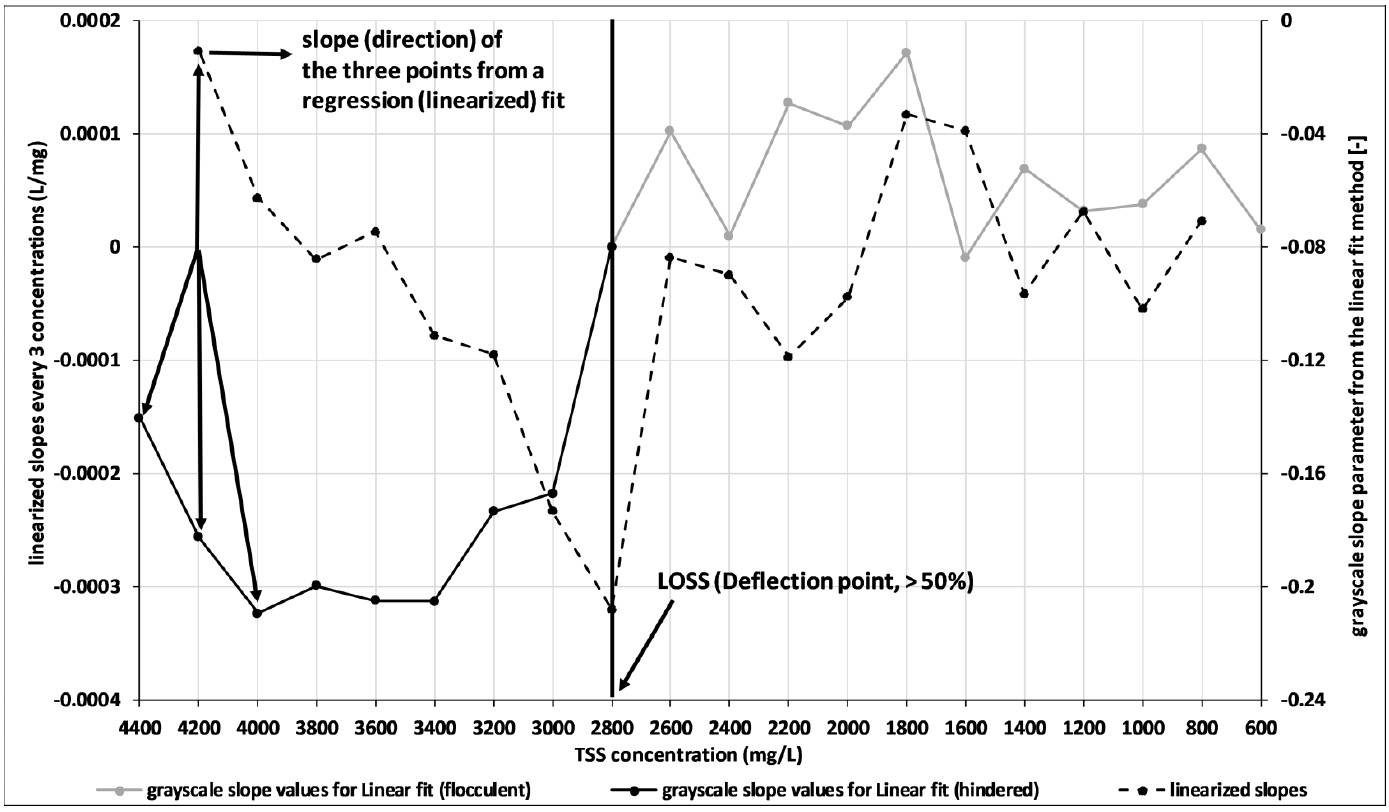

| |*Fig. 6 Calculation of LOSS using Linear fit slope values for Sample B. LOSS is at 2800 mg/L, before linearized slopes change by 100%*| |
|:--- |:----:| ---:|

#### B. Sigmoid Fit
Sigmoid fitting utilized the characteristic s-shaped intensity profile of hindered settling sludge to fit a sigmoid function (equation 2) and obtain logistic parameters.

| |Y(X) = A + (K-A)/(1 + e^(B(X-C)))    (2)| |
|:--- |:----:| ---:|

Where Y = Grayscale intensity, X = Jar height (pixels), K = Upper Asymptote (maximum intensity), A = Lower Asymptote (minimum intensity), B = Steepness of exponential curve, C = Inflection point (height at median intensity). For this study, K was set to 255 because it was the maximum intensity achievable. The sigmoid fit was done using the grayscale intensities on the entire settleometer. The steepness of the exponential curve (B) decreased as the sludge transitioned from hindered to flocculent (Fig. 5.). The quality of the sigmoid fit (fit error) also decreased as the sludge transitioned from hindered to flocculent and the inflection point also increased during the same transition. To find the LOSS, the B, C and fit error values were plotted on separate graphs, and in each graph, the values were linearized for every three TSS concentration points. The LOSS was the concentration at which a 25% change occurred in the linearized points. For comparison between other methods, the LOSS values for the sigmoid fit were calculated as an average between the LOSS values derived from the three parameters (B, C, fit error).


#### C. Noise Analysis

Noise analysis employed the change in scattering of light as the sludge transitioned from hindered to flocculent. In hindered settling, there is little light penetration through the jar, and hence less light scattering. Consequently, this results in relatively small variations in the grayscale intensity over the jar height. However, in flocculent settling, there is more light seeping through the jar because of spaces opened in between settling flocs and hence a more inconsistent gray-scale intensity is achieved. The noise refers the calculation of the average standard deviation of grayscale intensity across the jar, for an image at a concentration. A sharp increase in noise indicated the transition from hindered to flocculent settling. The noise values (average standard deviations) for each concentration were plotted, then linearized. A change in the linearized points of 50% indicated the LOSS concentration.

## 5. Data Analysis

### I. Criteria for Evaluating Measurement
- **Criteria 1**: A good setting (light intensity and settling time) for LOSS measurements using each method would yield a 100% determination possibility of LOSS across all sludge types. 100% was necessary because any lower percentage could mean a possibility of a failed LOSS calculation at the setting which is not ideal for field applications.

- **Criteria 2**: A good setting (light intensity and settling time) for LOSS measurements using each method would yield a maximum standard error between LOSS values of ±100 mg TSS/L, which is less than a 20% error in total suspended solids calculations. A 20% error is practical in field applications (APHA 1997), but any higher value would make the LOSS values unreliable.

### II. Consistency of LOSS Determination
Determination of the LOSS at different settling times and light intensities was not always possible, as in some cases, the minimum LOSS threshold to determine the LOSS concentration was not reached. Figs. 7. and 8. show the capability of the different methods in calculating LOSS over different light intensity and settling time settings. 100% determination meant that the meth-od used produced LOSS values for all its parameters. Across all samples, noise analysis failed at settling times and light intensities of (secs | light intensity) 70-80|200. Linear fit failed at settling times and light intensities of: 20|5, 80|5, 50-60|10 and, 60-90|200. Sigmoid fit failed at settling times and light intensities of: 0-40|5, 0-20|10, 0-10|25, 0-40|50, 0-10|75, 30|75, 0-20|200, 40-50|200 and 80-90|200.


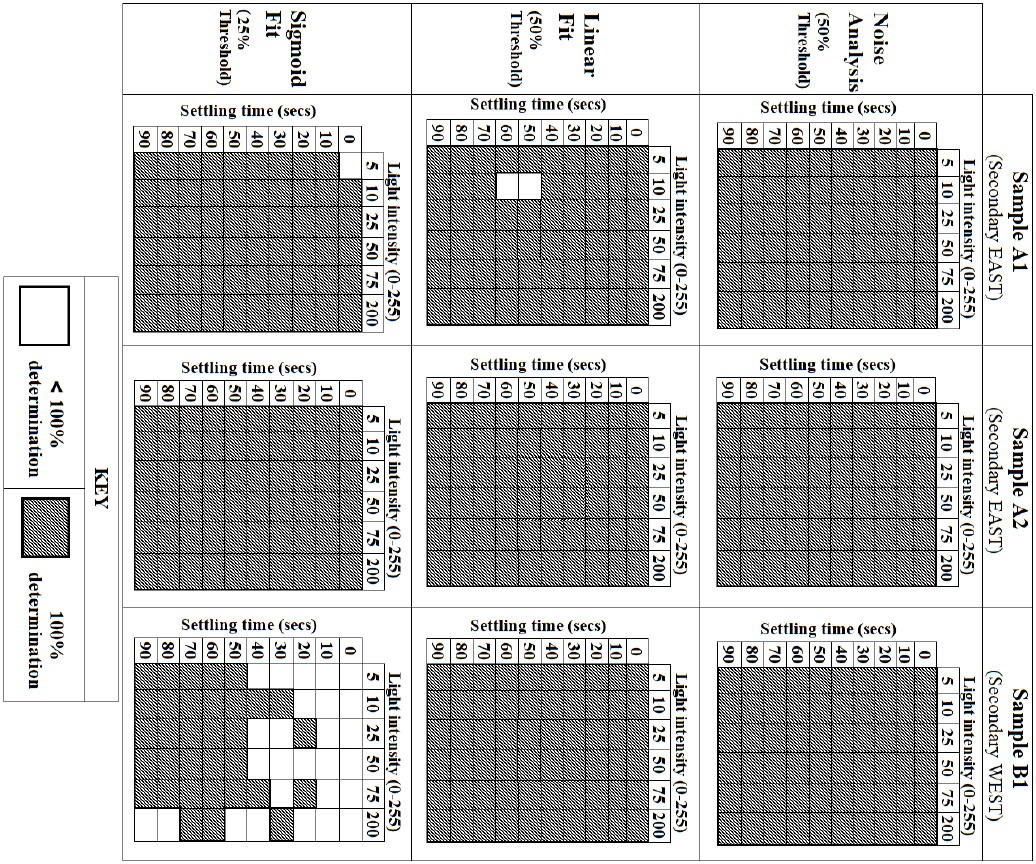


| |*Fig. 7 The settings tested and the capability of each method for samples A1, A2, and B1. Noise analysis and linear fit were each calculated at a 50% LOSS threshold, while the sigmoid fit was calculated at a 25% LOSS threshold*| |
|:--- |:----:| ---:|

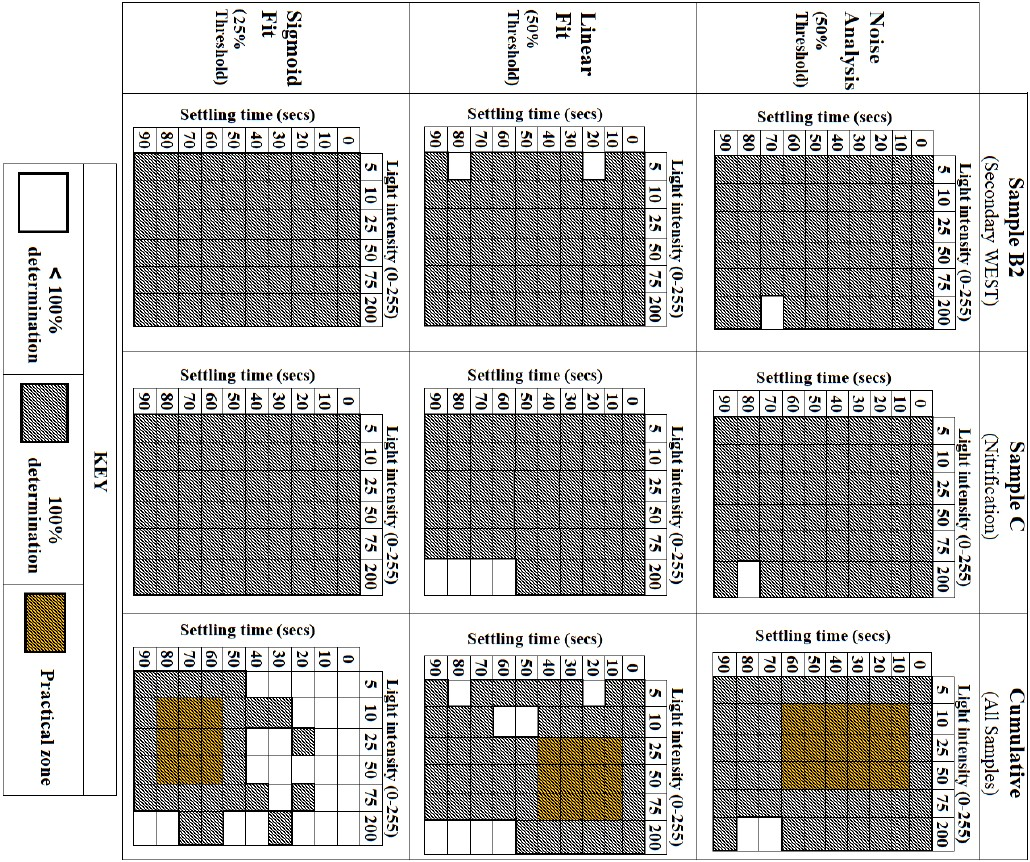

| |*Fig. 8 The settings tested and the capability of each method for samples B2 and C. The last column is the accumulation of all the failed calculations squares (less than 100% determination) in that method. The practical zone is the range of settings which are safe to use in engineering practice for each method. Noise analysis and linear fit were each calculated at a 50% LOSS threshold, while the sigmoid fit was calculated at a 25% LOSS threshold*| |
|:--- |:----:| ---:|


Of the sixty settling time/light intensity settings tested, the noise analysis succeeded in giving a LOSS value fifty-four times (90% success rate). The linear fit succeeded fifty-two times (87% success rate) and the sigmoid fit succeeded only thirty-three times (55% success rate). Consistent failure for the sigmoid came at settling times less than 50 seconds, at the brightest light intensity (200). Consistent failures for the linear fit came at settling times greater than 40 seconds, at darker light settings (5 and 10) and at the brightest light setting (200). The noise had the most reliability over different settings and performed best in criteria 1. For practical applications, LOSS calculations using noise analysis should be done in the settings range (secs | light intensity) of 10-50|10-50. LOSS calculations using the linear fit should be done in the settings range of (secs | light intensity) of 10-40|25-75. 0 seconds which is the initial image capture time after 10 minutes of mixing and stabilization was not considered as a practical zone because of a potential error occurring like a destabilized (still in mixing motion) mixture. LOSS calculations using the sigmoid fit should be done in the settings range of (secs | light intensity) of 60-80|10-50 for reliability.

From the results in Fig. 8, it was inferred that overexposure (75 and 200 light intensities) contributed to the reduced capability for the noise in calculating LOSS. Underexposure (5 and 10 light intensities) and overexposure (200 light intensity) also contributed to failures in the linear fit method. These failures were linked to the fading of the interface (or color gradient) be-tween the solids and liquid in bright (overexposed) or dark images for flocculent concentrations. Fig. 9. shows an example of a diminished interface, with a clear distinction of a visible gradient at 25 and 50 light intensities compared to 5 or 200 light intensity. Fig. 10. shows the graphs of the light intensities at 60 seconds of settling. At 200 light intensity, the shape of the graphs of lower concentrations (flocculent) were hard to distinguish from higher (hindered) concentrations. An overexposed image like 200 light intensity, resembled sludge which was completely in the compression phase of settling, rather than at 25 or 50 light intensity which had a flocculent layer above the compression layer.

The parameters needed to calculate LOSS for each method took advantage of the color gradient at the interface for sensitive analysis between hindered and flocculent concentrations. Hence, the minute differences between flocculent and hindered settling may have been lost in the underexposed and overexposed images (Pons and Vivier 1999). To establish a standardized method for LOSS calculations, it can be seen from the results that it may be more advantageous to do LOSS measurements using the noise method in a light intensity range between 5 to 50 to reduce effects of light exposure. For the linear fit method, a light intensity range between 25 to 75 is also acceptable.

Another factor that contributes to the lack of a LOSS value for the bright or dark exposures can be the formation of the compression layer. For sample C (Nitrification), the compression layer began to form quickly (i.e. after 50 s) due to the density of the flocs increasing the settling velocity compared to other sludge types (Schuler and Jang 2007; Koivuranta et al. 2014; Torfs et al. 2017). Thus, significant differences in the interface at the compression layer over the MLSS concentration range may not be present. This issue was more pronounced at 200 light intensity for the sample C in the noise analysis and linear fit methods (Fig. 8.). The evidence that under or overexposure did not affect the determination of LOSS values in samples B1 and A2 for the noise and linear fit methods could be linked to a visible color (solids) gradient throughout the settling jar in hindered and flocculent concentrations. However, in samples B2 and C, the solids gradient was harder to detect since the sludge settled faster.

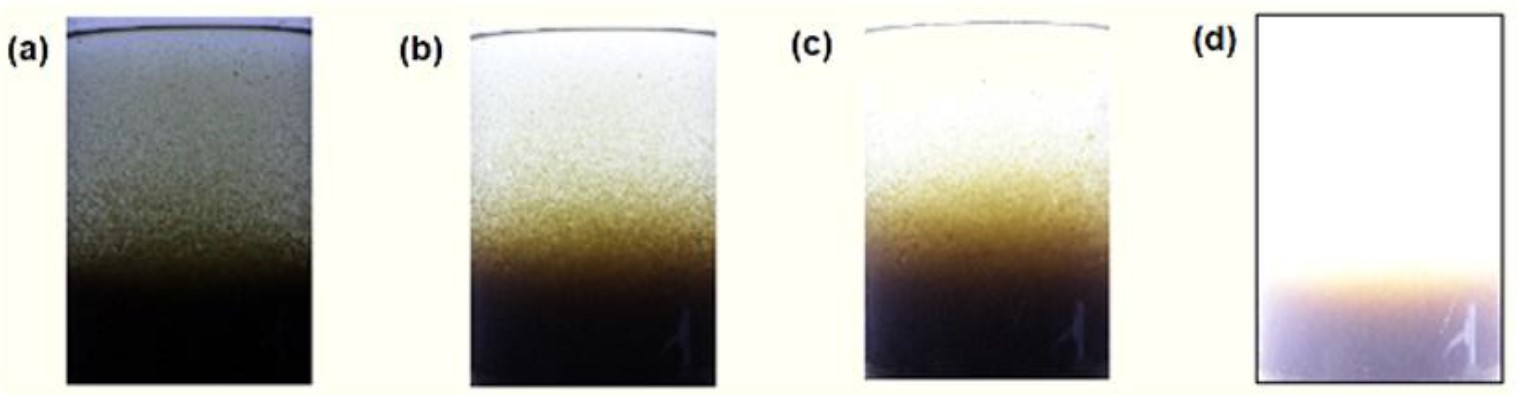

| |*Fig. 9 Sample C during 60 secs of settling time at (a) 5, (b) 25, (c) 50 and , (d) 200 light intensities. MLSS at 1600 mg/L (flocculent)*| |
|:--- |:----:| ---:|

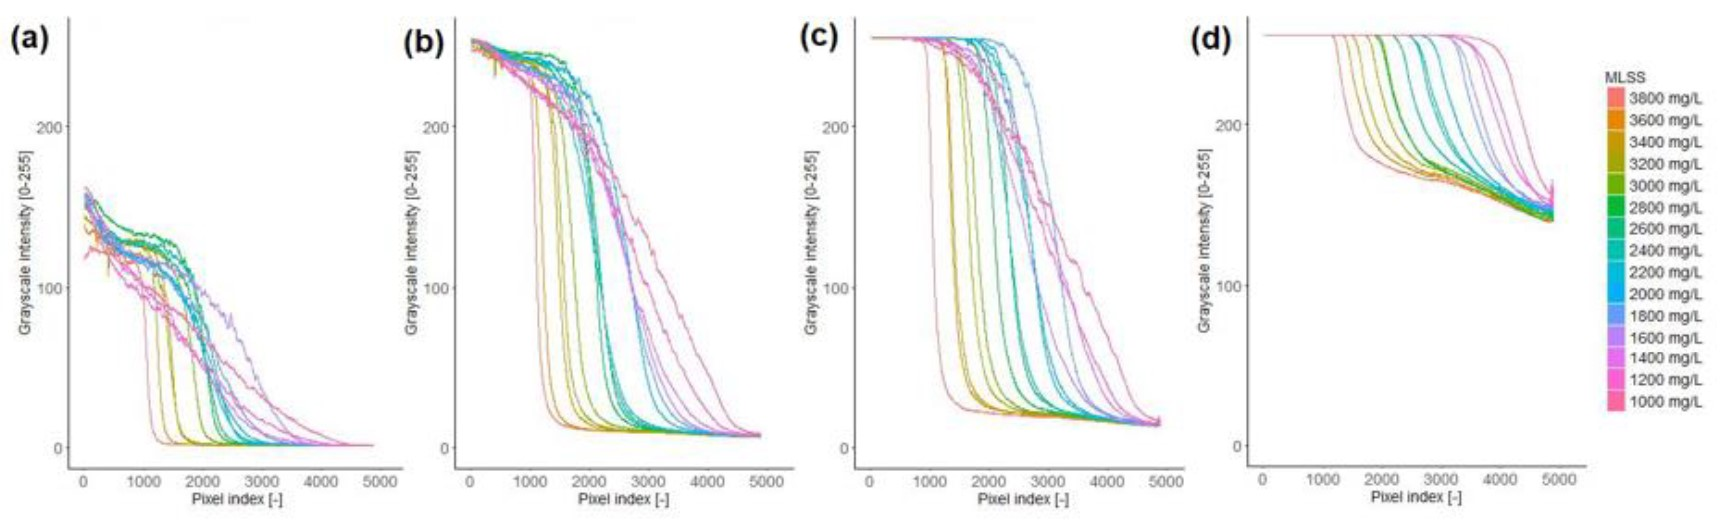

| |*Fig. 10 Sample C during 60 secs of settling time at (a) 5, (b) 25, (c) 50 and , (d) 200 light intensities*| |
|:--- |:----:| ---:|


The LOSS determination from the sigmoid fit was more sensitive than the other two methods, with the B value (steepness of exponential) contributing about 60-100% of undetermined LOSS values for the sigmoid fit. This failure in LOSS determination of the sigmoid com-pared to other methods was due to undefined values of parameters (B, C, fit error) used in the sigmoid calculation. In the computation of the sigmoid fit, when the sludge color intensity profile in the jar deviated significantly from the s-shaped logistic function, a sigmoid curve was unable to/poorly fit the data, which resulted in a lack of defined parameter values or high fit errors. This occurrence was more prevalent when the sludge profile was flocculent, because the color gradient increased, and the solids-liquid interface faded. Hence, the sigmoid was more equipped to fit a hindered sludge profile or compression profile than flocculent, since it looks like spline fitting used for measuring sludge bed height or SBH (Derlon et al. 2017).

In addition, the number of failed LOSS determinations for sample B1 using the sigmoid fit decreased as settling time increased (Fig. 7.). This trend was not seen in the other samples which may be due to the sludge properties. Sample B1 had poorer settling sludge with comparatively higher ESS and a high colloidal content, which perturbed flocculation. Good settling sludge have denser, more pinpoint, and less filamentous particles which take a smaller sur-face area, thus increasing the impact of brightness on the total surface area of the settling particles (Bisogni and Lawrence 1971; Jassby et al. 2014). In the good settling samples (B2 and C), where overexposure affected the noise and linear fit methods, the sigmoid was not affected. In sample B1, the sigmoid failed at shorter settling times (0-50s) because a clear interface had not been developed.

### III. Selection of LOSS Thresholds for Measurements
LOSS thresholds which are the percent change in the slope of the regression line of each meth-od’s parameter (i.e. r-squared, slope, B value, C value, fit error, noise), and are used in finding the LOSS number, were tested to see effect on the LOSS values determined (Figs. 11-13). For all methods, the number of settings which met criteria 1 decreased as the threshold increased in Figs 11 and 12. For noise analysis, the number of LOSS values at higher settling times and light intensities reduced as the threshold increased, and ultimately no practical range for settling time or light intensity was reasonable at the 400% threshold. The same trend was seen for the linear fit, as the brighter (75 and 200) and darker (5 and 10) light intensity settings along with the longer settling times (> 50s), gave more failure in calculating LOSS as the threshold increased. This is consistent with the knowledge that LOSS is harder to be measured in very bright/dark settings, as a color gradient is harder to detect in over/under exposed images (Juntunen et al. 2014), and in sludge with higher settling velocities, where a quickly forming compression layer can affect LOSS values taken at longer settling times. For the sigmoid fit, the increase in threshold also similarly reduced the number of LOSS values.

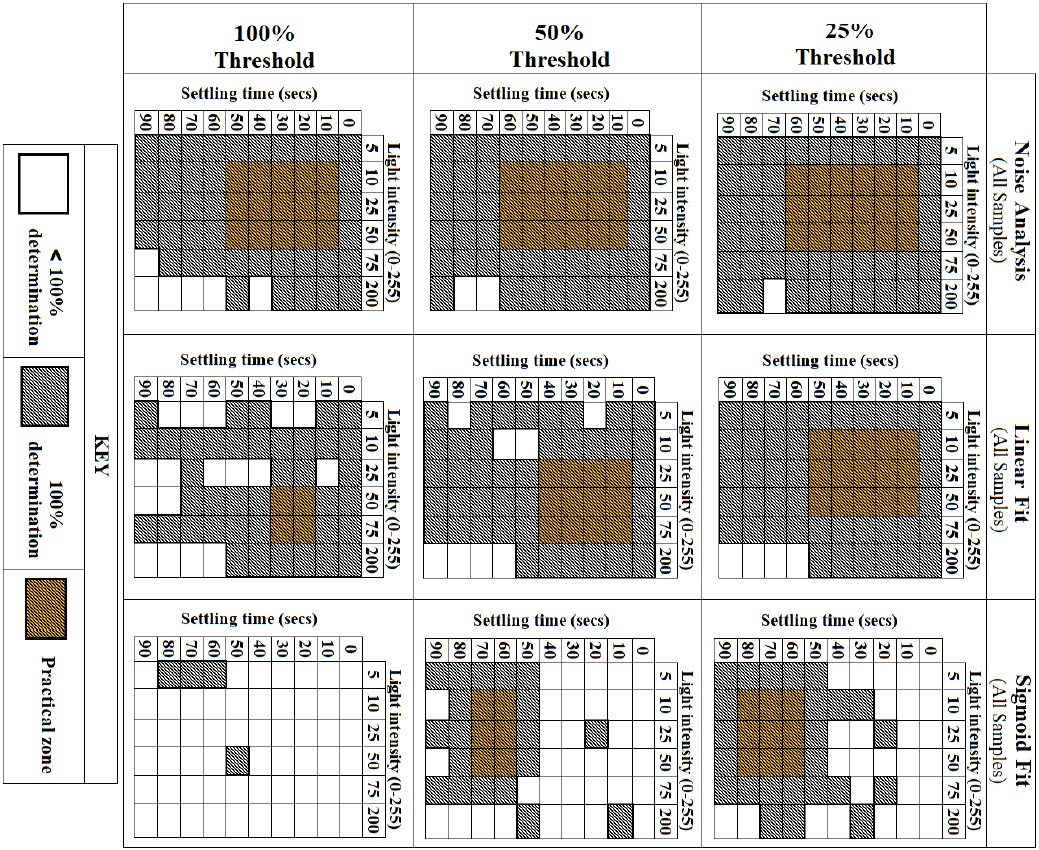

| |*Fig. 11 The settings tested and the capability of each method at LOSS thresholds of 25%, 50%, and 100%. The practical zone is the range of settings which are safe to use in engineering practice for each method*| |
|:--- |:----:| ---:|

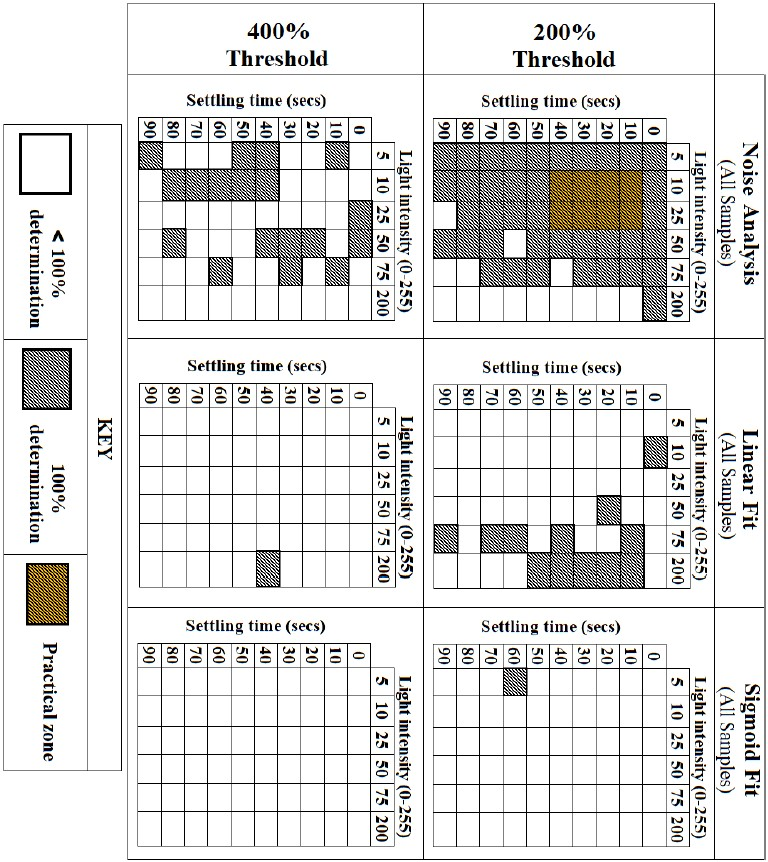

| |*Fig. 12 The settings tested and the capability of each method at LOSS thresholds of 200% and 400%. The practical zone is the range of settings which are safe to use in engineering practice for each method*| |
|:--- |:----:| ---:|

ANOVA/Kruskal-Wallis tests of the LOSS values for each method across each threshold in Fig. 13 did not yield statistically significant differences between the thresholds (p > 0.5 for all methods). However, standard errors of the noise LOSS values across thresholds in Fig. 13 which did not pass criteria 2 were ±106.1 mg TSS/L, ±123.7 mg TSS/L, ±132.6 mg TSS/L and, ±212.1 mg TSS/L for samples A1, B1, B2 and C respectively at the 200% threshold. At the 100% threshold, the standard errors for the noise LOSS which did not pass criteria 2 were ±100.3 mg TSS/L and, ±164.7 mg TSS/L for samples B2 and C respectively. The average LOSS values for the noise at the 25% and 50% thresholds all met criteria 2, hence a threshold below 100% was estimated to give more reliable results for the noise analysis method.

For the linear fit, the standard errors which did not pass criteria 2 were ±132.6 mg TSS/L and ±159.1 mg TSS/L, at the 100% threshold for samples B2 and C respectively. The average LOSS values for the noise at the 25% and 50% thresholds all met criteria 2, hence a threshold below 100% was also estimated to give more reliable results for the linear fit method. For the sigmoid fit, the standard error which did not pass criteria 2 was ±187.5 mg TSS/L at the 50% threshold for sample C. The average LOSS values for the sigmoid fit at the 25% threshold all met criteria 2, hence a threshold below 50% was assessed to give more reliable results for the sigmoid fit method.

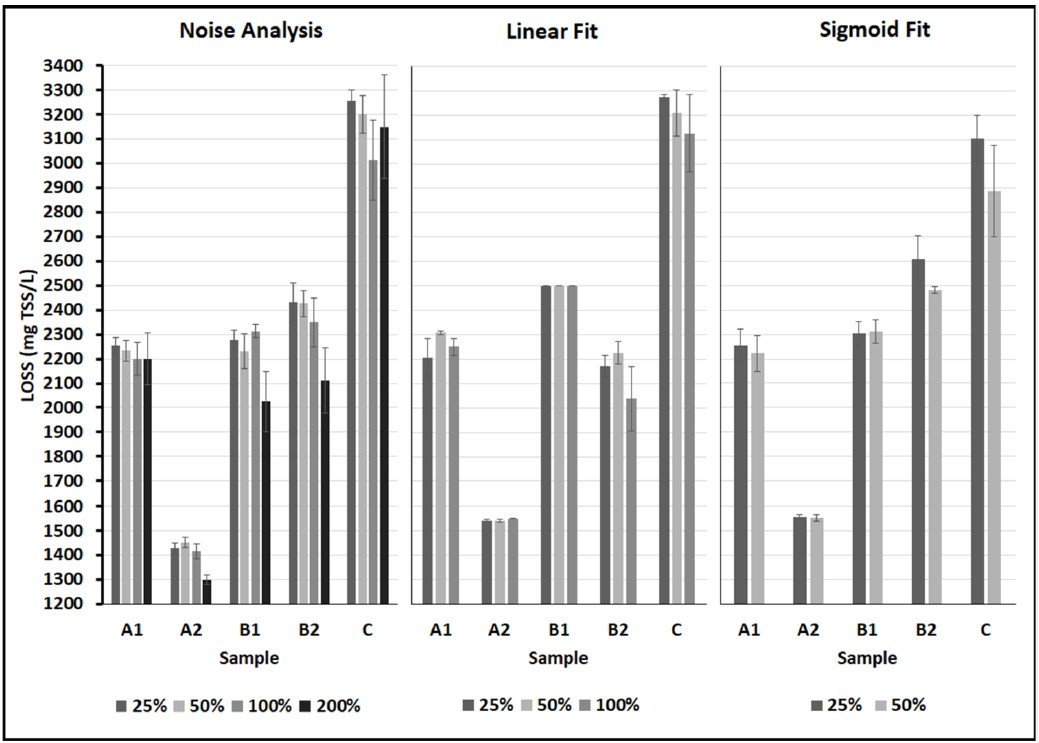

| |*Fig. 13 Average LOSS concentrations of all samples at various thresholds using the different mathematical methods. The LOSS values selected were those in the practical zone in Figs. 3.5-3.6. The values for the linear fit were also the averaged LOSS of its two parameters (slope and r-squared) and the values for the sigmoid fit were also the averaged LOSS of its three parameters (B and C values, Fit error)*| |
|:--- |:----:| ---:|

### IV. Precision of LOSS Values
For the noise method, the standard errors of LOSS for the samples using the settings in the practical zone (Fig. 8) were ±50.9 mg TSS/L, ±25.8 mg TSS/L, ±86.5 mg TSS/L, ±64.9 mg TSS/L and ±94.3 mg TSS/L for samples A1, A2, B1, B2 and C respectively (Fig. 14). In addition, the standard errors for the samples using the settings in the practical zone (Fig. 8) for the linear fit method were ±8.3 mg TSS/L, ±8.3 mg TSS/L, ±0 mg TSS/L, ±57.3 mg TSS/L and ±115.8 mg TSS/L for samples A1, A2, B1, B2 and C respectively (Fig. 14). For the sigmoid fit method, the standard errors of LOSS for the samples using the settings in the practical zone (Fig. 8) were ±80.1 mg TSS/L, ±11.1 mg TSS/L, 60.6 mg TSS/L, ±112.8 mg TSS/L and ±114.9 mg TSS/L for samples A1, A2, B1, B2 and C respectively (Fig. 14).

The standard errors for the noise analysis met criteria 2. The standard errors for the linear fit also met criteria 2 except in sample C. The linear fit did not do very well in sample C (nitrification sludge), which may be because the sludge settled faster than any other sludge tested, and sludge compression affected the measurement. The standard errors for the sigmoid fit met criteria 2 except in samples B2 (Secondary WEST) and C (Nitrification). These two samples were the better settling of the five samples, and the sigmoid did not do well in these quickly flocculating sludge. Noise analysis provided the most precision and consistency (met criteria 1 and 2 most times) with changing sludge properties compared to the other methods. This may be because noise took advantage of the whole sludge profile in the settling jar and relied on a consistently measurable quantity (standard deviation) for measurement. Whereas, linear fit only fit the top 1/3rd of the jar (some details in grayscale profile might have been lost in the other 2/3rd of the jar) and the sigmoid fit relied on multiple quantities (A, B, C and K values) for a good fit.

The sigmoid was not reliable in well flocculating sludge (high SRT) due to the grayscale profiles of the settling sludge being more linear than sigmoidal and evidenced by the fit error increasing as the profile became more flocculent. Comparing the linear fit and noise methods, Mann Whitney U tests between the two methods showed significant differences (p < 0.05) for LOSS in samples A2 (Secondary EAST), B1 and B2 (Secondary WEST). Although the linear fit was very precise, the noise method gave better overall confidence on the LOSS values (Fig. 14), and as a result low dependency on settling time and light intensity. Noise LOSS values for each activated sludge sample also gave insight into the settleability of the samples. Higher LOSS values and standard errors in the measurement indicated quickly flocculating sludge (Fig. 14). Sample C (Nitrification) had the highest LOSS value (~3200 mg TSS/L) which indicated good flocculation and/or poor compressibility of the sludge. High LOSS values could be derived even though settleability is poor, as seen in samples A1 (Secondary EAST) and B1 (Secondary WEST) as the MLSS for both were above the LOSS of 2442 and 2375 mg TSS/L respectively. This was mainly due to poor compressibility of the sludge, resulting from high colloidal solids in the activated sludge.

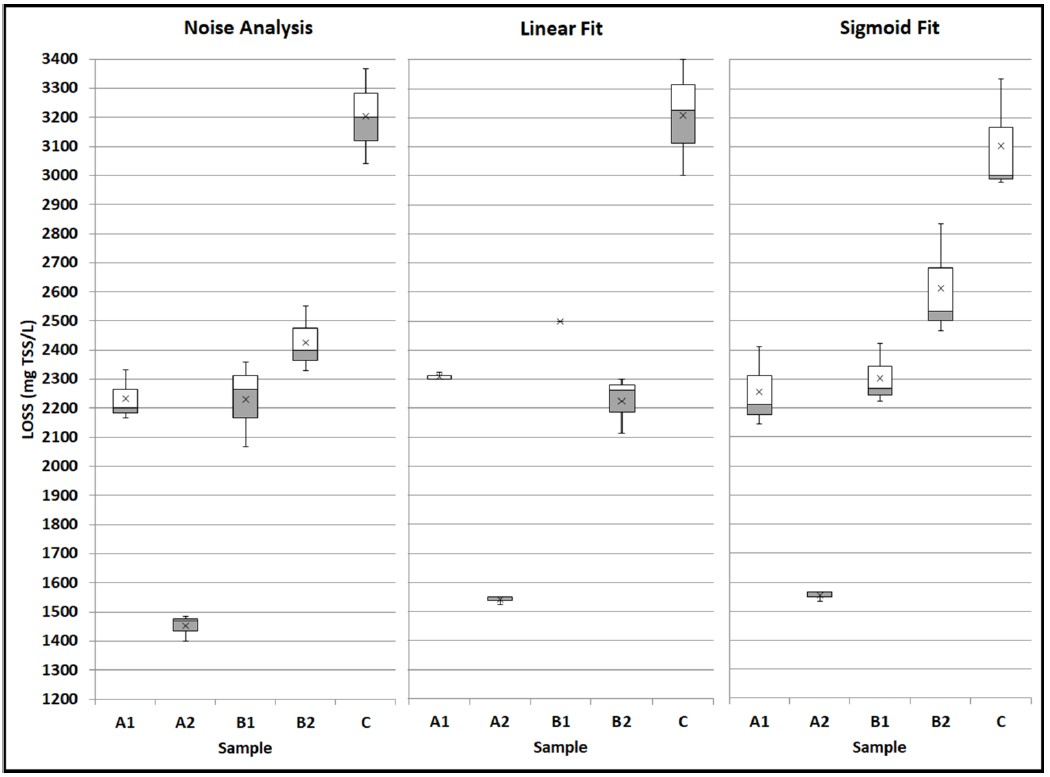

| |*Fig. 14 Average LOSS values at settings which met criteria 1. The values for the linear fit were the averaged LOSS of its two parameters (slope and r-squared) and the values for the sigmoid fit were also the averaged LOSS of its three parameters (B and C values, Fit error)*| |
|:--- |:----:| ---:|

As the MLSS’s in samples A1 and B1 increased, flocculation was still slowly taking place as the solids did not compact to form the hindered settling or compression layer. The reason the settleability in samples A1 and B1 were poor (slow) was likely due to a limitation in the collisions of particles, as the colloidal content was high (Van-Winckel et al. 2018). Increased collisions, density of flocculating particles and strength of flocs are important to pro-duce better settleability of activated sludge (Mancell-Egala et al. 2017; Van-Winckel et al. 2018). As a result, compact or denser activated sludge like BNR in sample C have higher LOSS values. High LOSS values are desired to help mitigate clarifier failures, but also give an understanding of the settleability of the sludge.

## 6. Conclusion

LOSS values are never constant, and are dependent on sludge type and settling characteristics. Mancell-Egala et al. (2016) had a total range of LOSS values from 500 - 1000 mg TSS/L for secondary sludge, but LOSS values were calculated using the previous method which had not been standardized. A comparison of ten LOSS values against modelled LOSS values (calculated using a modified Takacs et al., 1991 settling velocity model), showed a poor correlation (r = 0.35). The original LOSS method also underestimated the modelled LOSS, as it was too sensitive to changes in the color intensity in the jar, especially in the small window of measurement (2 cm) compared to the entire jar. The modelled LOSS used a more intrinsic characteristic of the sludge – settling velocity – and was an empirical model of several concentrations of solids concentration versus settling velocity. This model was tedious to recreate repeatedly for different sludge types and changing characteristics.

However, **intrinsic sludge parameters like floc size and surface area, which are key to determining hindered settling profiles, are linked to the noise in the images of the settling profile.** More pore spaces which increase the noise value indicate flocs that have less surface area (pin-point flocs). As a result, the noise method was a better approximation of the LOSS concentration compared to Mancell-Egala et al. (2016), as it had backing in a fundamental characteristic of settling particles. **Noise analysis showed more consistent and less variable results when used to calculate the LOSS concentration over all the different sludge types.** Settling time affected the LOSS measurement and measuring the LOSS between 0 to 50 seconds of settling gave the most reliability in measurement using the noise. Light intensity also affected measurement and measuring the LOSS between 5 to 50 light intensity range gave the most consistency in measurement using the noise. A methodology and novel calculation technique (noise analysis) for LOSS calculation was proposed and was standardized for changing sludge properties and conditions (i.e. brightness and settling time). This could be useful in helping to estimate LOSS in field applications and subsequently mitigate clarifier failures in treatment plants.

However, LOSS is not necessarily a direct indicator of good or poor effluent quality. Effluent quality can be poor, even with the activated sludge having a high LOSS value. High LOSS values indicate that the sludge compresses poorly and/or flocculates well. In some cases, poor effluent quality may be more so linked to a high non-settleable fraction of solids in the sludge. The LOSS also does not provide a direct link to the strength of the flocs formed while settling. The floc strength also influences the flocculation as stronger flocs are desired than fluffy flocs (Van Winckel et al. 2018). LOSS should be used in conjunction with other settling metrics like TOF, Floc strength tests, to estimate the link between settleability and good effluent quality.

## 7. Appendix

This section includes the code for plotting the graphs. Calculation were made for all models based on the RGB data generated from each picture of settling sludge taken by the camera.

In [6]:
# LIBRARIES, GLOBAL VARIABLES AND FUNCTIONS
library(ggplot2)
library(splines)
library(reshape2)
library(calibrate)



Reactor <- ""
Date <- ""
folder_directory <- ""
time_interval_pics <- 10
Concentration_count <- 15
Concentration_pic_count <- 13
first_photo <- 1001
first_concentration_last_photo <- 1013
last_concentration_first_photo <- 2093
label_time <- seq(from = 0, to = 120, by = time_interval_pics)
#TSS <- c(2000, 1500, 1400, 1300, 1200, 1100, 1000, 900, 800, 700, 600, 500, 400, 300) 
TSS <- seq(from = 3400, to = 600, by = -200)
start_pixel <- 300
interval <- 100
thresh <- -100
rows <- 4
cols <- 4


slp <<- c()
r_sq <<- c()
B_values <<- c()
C_values <<- c()
res_values <<- c()
All_Loss <<- c()
All_Loss2 <<- c()
All_Loss3 <<- c()
All_perc <<- c()
All_perc2 <<- c()
All_perc3 <<- c()
LOSS_Values <- c()


noise_List <<- c()
LOSS_List <- list()
LOSS_Values2 <- list()
LOSS_Values3 <- list()
LOSS_Values4 <- list()
LOSS_Values5 <- list()
LOSS_Values6 <- list()
LOSS_Values7 <- list()


first_pic <- c(1:6)
first_concentration_last_pic <- c(1:6)
last_concentration_first_pic <- c(1:6)
directory <- paste(folder_directory, "Data", sep = "")
Exposure <- c("1-400", "1-160", "1-60", "1-30", "1-10", "1-2")
first_pic[1] <- first_photo
first_concentration_last_pic[1] <- first_concentration_last_photo
last_concentration_first_pic[1] <- last_concentration_first_photo
f <- (Concentration_count-1)
g <- (Concentration_count-2)

for (i in 2:length(first_pic))
{first_pic[i] <- first_pic[i-1] + Concentration_pic_count}
for (i in 2:length(first_concentration_last_pic))
{first_concentration_last_pic[i] <- first_concentration_last_pic[i-1] + Concentration_pic_count}
for (i in 2:length(last_concentration_first_pic))
{last_concentration_first_pic[i] <- last_concentration_first_pic[i-1] + Concentration_pic_count}

threshold <- abs(thresh)
perc_change_slp <- thresh
perc_change_rsq <- thresh
perc_change_sig_B <- thresh
perc_change_sig_C <- thresh
perc_change_sig_res <- thresh
perc_change_noise <- thresh





# FUNCTION TO PLOT THE RGB GRAPHS OF ALL THE CONCENTRATIONS IN THE SLUDGE
multiplot <- function(dataset, start = "", end = "", TSS, label2, label3, title = "", filename = 0, file_destination = "", file_end = "")
{
  data <- c(1:length(dataset))
  legend_titles <- c(1:length(dataset))
  for(i in 1:length(dataset))
  {
    read <- read.table(paste(start, dataset[i], end, sep = ""), header = F, col.names = c("Jar Height", "Intensity"), skip = start_pixel)
    data[i] <- list(read[,2])
    legend_titles[i] <- paste(TSS[i], label2, sep = "")
  }
  data_combined <- do.call(cbind, data)
  colnames(data_combined) <- legend_titles
  melt_data <- melt(data_combined)
  
  plot <- ggplot(melt_data, aes(x = Var1, y=value)) + xlab("Pixel index [-]") + ylab("Grayscale intensity [0-255]") + ylim(0,255) + xlim(0, 5200)
  # plot <- plot + geom_line(aes(color = as.factor(Var2))) + theme_classic() + guides(colour = guide_legend(override.aes = list(size=7))) + ggtitle(title) + scale_color_manual(name = label3, values=c("#DA5724", "#74D944", "#CE50CA", "#3F4921", "#C0717C", "#CBD588", "#5F7FC7", "#673770", "#D3D93E", "#38333E", "#508578", "#D7C1B1", "#689030", "#3794BF", "#9BC9DF", "#EFC29F", "#DF8640", "#999999", "#E69F00", "#56B4E9", "#89C5DA", "#AD6F3B", "#CD9BCD", "#D14285", "#6DDE88", "#652926", "#7FDCC0", "#C84248", "#8569D5", "#5E738F", "#D1A33D", "#8A7C64", "#599861", "#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628", "#F781BF"))
  plot <- plot + geom_line(aes(color = as.factor(Var2))) + theme_classic() + guides(colour = guide_legend(title = "MLSS", override.aes = list(size=7))) + ggtitle(title) + theme(legend.text=element_text(size=14), axis.text = element_text(size=14), text = element_text(size=14)) 
  jpeg(file = paste(file_destination, filename, file_end, ".jpg", sep = ""))
  print(plot)
  dev.off()
}









# FUNTION TO COMPUTE NOISE ANALYSIS
noise <- function(dataset, start = "", end = "", filename = 0, filename2 = 0, file_destination = "")
{
  noise_List <<- c()
  
  sdev <- list()
  sd_mean <- c(1:length(dataset))
  x_list <- seq(1000,5100,100)
  for(j in 1:length(dataset))
  {
    data <- read.table(paste(start, dataset[j], end, sep = ""), header = F, col.names = c("Jar Height","Intensity"))
    sd_diff <- c() #sd_diff <- c(1:((length(data$Intensity)%/%interval))-(1000%/%interval)) 
    for(i in (1000%/%interval):(length(data$Intensity)%/%interval))
    {
      x <- data$Intensity[((i-1)*interval):(i*interval)]
      sd_diff[i-9] <- sd(diff(x))
    }
    #sd_diff <- sd_diff[sd_diff > 0.05]
    sdev <- c(sdev, list(sd_diff))
    sd_mean[j] <- mean(sd_diff)
  }
  jpeg(file = paste(file_destination, filename, sep = ""), width = 1920, height = 1080)
  par(mfcol=c(rows,cols))
  for(k in 1:length(dataset))
  {
    plot(x_list, sdev[[k]], main = paste("Mean standard deviation = ", signif(sd_mean[k],4), sep = ""), col="black", cex=1.5, pch = c(19), ylim = c(0, 0.2), sub = paste(TSS[Concentration_count-k+1], "mg/L", sep = " "), xlab = "Jar Height (pixels)", ylab = "Standard deviation", cex.lab=1.9, cex.axis=2.3, cex.main=2.5, cex.sub=1.2)
    abline(h=sd_mean[k], col = "red", lwd = 1.5)
    legend("topright",
           legend = c("Mean standard deviation"),
           col = c("red"),
           pch = c(19),
           bty = "o",
           pt.cex = 2,
           cex = 2,
           text.col = "black",
           horiz = F
           #,inset = c(0.1, 0.1)
    )
  }
  dev.off()
   
# FUNCTION TO COMPUTE SIGMOID FIT    
sigmoidal_fit <- function(number, subtitle = "", end = "")
{
  intensity_whole = read.table(paste("IMG_", number, end, sep = ""), sep = "\t", skip = start_pixel, header =FALSE)
  median_intensity = (max(intensity_whole$V2) + min(intensity_whole$V2))/2
  for(i in 1:length(intensity_whole$V1))
    if(median_intensity - intensity_whole$V2[i] < 0.2)
      median_height = intensity_whole$V1[i]
  intensity <- subset(intensity_whole, V1 > (median_height - 5000))
  #intensity <- subset(intensity, V1 < (median_height + 1800))
  plot(intensity_whole$V1,intensity_whole$V2, xlab = "Jar Height (pixels)", ylab = "Intensity", sub = subtitle, cex.lab=1.9, cex.axis=2.3, cex.main=2.5, cex.sub=1.2)
  #nls_fit <- nls(V1 ~ A/(1 + exp(B*(V2) - C)) + D, intensity, start = list(A = max(intensity$V1) - min(intensity$V1), B = 0.01 , C = 3500, D = min(intensity$V1)))
  tryCatch({nls_fit <- nls(V2 ~ A + (max(intensity$V2) - A)/(1 + exp(B*(V1 - C))),  intensity, start = list(A = min(intensity$V2), B = 0.001, C = median_height), control = nls.control(maxiter = 500, minFactor = 1/1048576))
                  A <- round(coef(nls_fit)[1], digits = 4)
                  B <- round(coef(nls_fit)[2], digits = 4)
                  C <- round(coef(nls_fit)[3], digits = 4)
                  res_error <- round(sqrt(deviance(nls_fit)/df.residual(nls_fit)), digits = 4)
                  #D <- round(coef(nls_fit)[4], digits = 4)
                  B_values <<- c(B_values, B)
                  C_values <<- c(C_values, C)
                  res_values <<- c(res_values, res_error)
                  legend("topright",
                         legend = c("Fitted Sigmoid curve", paste("y(x)= ", signif(A,4),"+","((",255-signif(A,4),")/", sep=""), paste("(1+exp(",signif(B,2),"(x-",signif(C,4),"))))", sep="")),
                         col = c("red", "white", "white"),
                         pch = c(19),
                         bty = "o",
                         pt.cex = 2,
                         cex = 1.5,
                         text.col = "black",
                         horiz = F
                         #,inset = c(0.1, 0.1)
                  )
                  intensity$fit <- predict(nls_fit, intensity)
                  title(main = paste("B = ", signif(B,4),", C = ", signif(C,4), ", Fit error = ", signif(res_error,4), sep = ""), cex.main=2.5)
                  lines(intensity$V1,intensity$fit,col='red', lwd = 2)
                 }, 
                      error = function(t){
                        B_values <<- c(B_values, NaN)
                        C_values <<- c(C_values, NaN)
                        res_values <<- c(res_values, NaN)})
  
}
    
    
    
    
    


# FUNCTION TO COMPUTE LINEAR FIT    
slope_interface <- function(dataset, end = "")
{
  data <- read.table(paste("IMG_", dataset, end, sep = ""), header = F, col.names = c("Jar_Height","Intensity"), skip = start_pixel)
  x <- data$Jar_Height[1:(length(data$Jar_Height)%/%3)]
  y <- data$Intensity[1:(length(data$Intensity)%/%3)]
  #x <- sort(x, decreasing = TRUE)
  #fit <- lm(x ~ y)
  fit <- lm(y ~ x)
  slope <- coef(fit)[2]
  intercept <- coef(fit)[1]
  rsq <- summary(fit)$r.squared
  slp <<- c(slp, (signif(slope,4)))
  r_sq <<- c(r_sq, signif(rsq,4))
  #rsq <- summary(fit)$adj.r.squared
  #plot(data$Jar_Height, data$Intensity, main = paste("slope = ", signif(slope,4), ", y-int = ", signif(intercept,4), ", R-sq = ", signif(rsq,4), sep = ""), sub = paste(TSS[i], "mg/L", sep = " "), xlab = "Jar Height (pixels)", ylab = "Intensity", cex.lab=1.3, cex.axis=1.5, cex.sub=1.3, cex.main=1.5)
  plot(x, y, main = paste("Slope = ", signif(slope,4), ", R-squared = ", signif(rsq,4), sep = ""), sub = paste(TSS[Concentration_count-i], "mg/L", sep = " "), xlab = "Jar Height (pixels)", ylab = "Intensity", cex.lab=1.9, cex.axis=2.3, cex.main=2.5, cex.sub=1.2)
  abline(fit, col = "red", lwd = 2)
  legend("topright",
         legend = c("Regression line", paste("y(x) = ", signif(slope,4), "x + ", signif(intercept,4), sep="")),
         col = c("red", "white"),
         pch = c(19),
         bty = "o",
         pt.cex = 2,
         cex = 1.5,
         text.col = "black",
         horiz = F
         #,inset = c(0.1, 0.1)
  )
  }
    
    
    
    
    
# CALCULATING THE LOSS VALUES AND PLOTTING THEM
    
# CALCULATIONS
setwd(directory)

for (q in 1:6)
{
# Noise-Analysis LOSS values
for (i in 0:(Concentration_pic_count-4)){
  noise(seq(from = (last_concentration_first_pic[q] + i), to = (first_pic[q] + i), by = Concentration_pic_count*(-6)), start = "IMG_", end = ".JPG data.txt", paste("_Noise_", 0 + time_interval_pics*i, ".jpg", sep = ""), 0 + time_interval_pics*i, paste("../Plots/", Exposure[q], "/Noise/", threshold, sep = ""))
  LOSS_Values2 <<- c(LOSS_Values2, list(noise_List))
}
LOSS_Values <- c(LOSS_Values, All_Loss)
LOSS_List <- c(LOSS_List, list(All_Loss))
All_Loss <<- c()

# Linear fit LOSS values
for (w in 0:(Concentration_pic_count-4)){

  jpeg(file = paste("../Plots/", Exposure[q], "/Slope/", threshold, "_All_Slopes_", label_time[w+1], ".jpg", sep = ""), width = 1920, height = 1080)
  par(mfcol=c(rows,cols))
  for(i in 0:(Concentration_count-1)){
    slope_interface(last_concentration_first_pic[q]+w - Concentration_pic_count*6*i, end = ".JPG data.txt")}
  dev.off()

  Loss <- "N/A"
  Loss_slope <- c(0:(Concentration_count-3))
  Loss_rsq <- c(0:(Concentration_count-3))
  Loss_perc_change <- c(0:(Concentration_count-4))
  Loss_perc_change_rsq <- c(0:(Concentration_count-4))
  x <- TSS
  y <- rev(slp)
  z <- rev(r_sq)

  for (e in 0:(Concentration_count-3))
    {x1 <- c(x[e+1], x[e+2], x[e+3])
    y1 <- c(y[e+1], y[e+2], y[e+3])
    z1 <- c(z[e+1], z[e+2], z[e+3])
    Loss_lm <- lm(y1~x1)
    Loss_lz <- lm(z1~x1)
    Loss_slope[e+1] <- coef(Loss_lm)[2]
    Loss_rsq[e+1] <- coef(Loss_lz)[2]}
  for (e in 0:(Concentration_count-4))
    {Loss_perc_change[e+1] <- signif(((Loss_slope[e+2]-Loss_slope[e+1])/abs(Loss_slope[e+1]))*100,4)
    Loss_perc_change_rsq[e+1] <- signif(((Loss_rsq[e+2]-Loss_rsq[e+1])/abs(Loss_rsq[e+1]))*100,4)

    All_perc <<- c(All_perc, Loss_perc_change[e+1])
    All_perc2 <<- c(All_perc2, Loss_perc_change_rsq[e+1])

    }
  for (e in 0:(Concentration_count-5))
    {if (isTRUE((Loss_perc_change[e+1] > perc_change_slp) & (Loss_perc_change[e+2] < perc_change_slp)))
    {
      Loss <- x[e+5]
    break}}
  All_Loss <<- c(All_Loss, Loss)

  LOSS_Values3 <- c(LOSS_Values3, list(All_perc))
  LOSS_Values4 <- c(LOSS_Values4, list(All_perc2))
  All_perc <<- c()
  All_perc2 <<- c()

  jpeg(file = paste("../Plots/", Exposure[q], "/Slope/", threshold, "_Slope_", label_time[w+1], ".jpg", sep = ""), width = 800, height = 600)
    par(oma=c(1,1,0,1),mar=c(4,4,2,0),mfrow=c(2,1))
    plot(x, y, xaxt = "n", xlim = rev(range(x)), main = paste(Reactor, Date, label_time[w+1], "secs;", "LOSS =", Loss), xlab = "", ylab = "slopes")
    axis(1, at = TSS, las=2)
    if (is.nan(Loss))
      {}
    else abline(v = Loss)
    plot(x[2:f], Loss_slope, xlim = rev(range(x)), xaxt = "n", xlab = "TSS concentration (mg/L)", ylab = "slopes of slopes") #, "LOSS =", Loss), xlab = "TSS concentration (mg/L)", ylab = "linear fit slope")
    # textxy(x[3:f], Loss_slope[2:g], Loss_perc_change, cex = 1, col = "red")
    axis(1, at = TSS, las=2)
    if (is.nan(Loss))
      {}
    else abline(v = Loss)
  dev.off()

  Loss <- "N/A"

  for (e in 0:(Concentration_count-5))
  {if (isTRUE((Loss_perc_change_rsq[e+1] > perc_change_rsq) & (Loss_perc_change_rsq[e+2] < perc_change_rsq)))
  {
    Loss <- x[e+5]
  break}}
  All_Loss2 <<- c(All_Loss2, Loss)


  jpeg(file = paste("../Plots/", Exposure[q], "/Slope/", threshold, "_Rsq_", label_time[w+1], ".jpg", sep = ""), width = 800, height = 600)
    par(oma=c(1,1,0,1),mar=c(4,4,2,0),mfrow=c(2,1))
    plot(x, z, xaxt = "n", xlim = rev(range(x)), main = paste(Reactor, Date, label_time[w+1], "secs;", "LOSS =", Loss), xlab = "", ylab = "rsq")
    axis(1, at = x, las=2)
    if (is.nan(Loss))
    {}
    else abline(v = Loss)
    plot(x[2:f], Loss_rsq, xlim = rev(range(x)), xaxt = "n", xlab = "TSS concentration (mg/L)", ylab = "slopes of rsq") #, "LOSS =", Loss), xlab = "TSS concentration (mg/L)", ylab = "linear fit slope")
    # textxy(x[3:f], Loss_rsq[2:g], Loss_perc_change_rsq, cex = 1, col = "red")
    axis(1, at = x, las=2)
    if (is.nan(Loss))
    {}
    else abline(v = Loss)
  dev.off()

  r_sq <<- c()
  slp <<- c()
  }
LOSS_Values <- c(LOSS_Values, All_Loss)
LOSS_Values <- c(LOSS_Values, All_Loss2)
LOSS_List <- c(LOSS_List, list(All_Loss))
LOSS_List <- c(LOSS_List, list(All_Loss2))
All_Loss <<- c()
All_Loss2 <<- c()


# Sigmoid-fit LOSS values
for (w in 0:(Concentration_pic_count-4)){

  jpeg(file = paste("../Plots/", Exposure[q], "/Sigmoid/", threshold, "_All_Sigmoid_", label_time[w+1], ".jpg", sep = ""), width = 1920, height = 1080)
  par(mfcol=c(rows,cols))
  for(i in 0:(Concentration_count-1)){
    sigmoidal_fit(last_concentration_first_pic[q]+w - Concentration_pic_count*6*i, paste(TSS[Concentration_count-i], "mg/L", sep = " "), end = ".JPG data.txt")}
  dev.off()

  Loss_slope <- c(0:(Concentration_count-3))
  Loss_slope_c <- c(0:(Concentration_count-3))
  Loss_slope_res <- c(0:(Concentration_count-3))
  Loss_perc_change <- c(0:(Concentration_count-4))
  Loss_perc_change_c <- c(0:(Concentration_count-4))
  Loss_perc_change_res <- c(0:(Concentration_count-4))
  x <- TSS
  y <- rev(B_values)
  z <- rev(C_values)
  u <- rev(res_values)

  for (e in 0:(Concentration_count-3))
    {
    tryCatch({
    x1 <- c(x[e+1], x[e+2], x[e+3])
    y1 <- c(y[e+1], y[e+2], y[e+3])
    z1 <- c(z[e+1], z[e+2], z[e+3])
    u1 <- c(u[e+1], u[e+2], u[e+3])
    Loss_lm <- lm(y1~x1)
    Loss_lz <- lm(z1~x1)
    Loss_lu <- lm(u1~x1)
    Loss_slope[e+1] <- coef(Loss_lm)[2]*1000000
    Loss_slope_c[e+1] <- coef(Loss_lz)[2]*1000000
    Loss_slope_res[e+1] <- coef(Loss_lu)[2]*1000},
    error = function(t){
      Loss_slope[e+1] <<- NaN
      Loss_slope_c[e+1] <<- NaN
      Loss_slope_res[e+1] <<- NaN
    })}
  for (e in 0:(Concentration_count-4))
    {
    tryCatch({Loss_perc_change[e+1] <- signif(((Loss_slope[e+2]-Loss_slope[e+1])/abs(Loss_slope[e+1]))*100,4)
      Loss_perc_change_c[e+1] <- signif(((Loss_slope_c[e+2]-Loss_slope_c[e+1])/abs(Loss_slope_c[e+1]))*100,4)
      Loss_perc_change_res[e+1] <- signif(((Loss_slope_res[e+2]-Loss_slope_res[e+1])/abs(Loss_slope_res[e+1]))*100,4)

      All_perc <<- c(All_perc, Loss_perc_change[e+1])
      All_perc2 <<- c(All_perc2, Loss_perc_change_c[e+1])
      All_perc3 <<- c(All_perc3, Loss_perc_change_res[e+1])

      },
    error = function(t){
      Loss_perc_change[e+1] <<- NaN
      Loss_perc_change_c[e+1] <<- NaN
      Loss_perc_change_res[e+1] <<- NaN

      All_perc <<- c(All_perc, Loss_perc_change[e+1])
      All_perc2 <<- c(All_perc2, Loss_perc_change_c[e+1])
      All_perc3 <<- c(All_perc3, Loss_perc_change_res[e+1])

    })}

  Loss <- "N/A"
  for (e in 0:(Concentration_count-5))
    {if (isTRUE((Loss_perc_change[e+1] > perc_change_sig_B) & (Loss_perc_change[e+2] < perc_change_sig_B)))
    {
      Loss <- x[e+5]
    break}}
  All_Loss <<- c(All_Loss, Loss)

  LOSS_Values5 <- c(LOSS_Values5, list(All_perc))
  LOSS_Values6 <- c(LOSS_Values6, list(All_perc2))
  LOSS_Values7 <- c(LOSS_Values7, list(All_perc3))
  All_perc <<- c()
  All_perc2 <<- c()
  All_perc3 <<- c()

  jpeg(file = paste("../Plots/", Exposure[q], "/Sigmoid/", threshold, "_Sigmoid_B_", label_time[w+1], ".jpg", sep = ""), width = 800, height = 600)
    par(oma=c(1,1,0,1),mar=c(4,4,2,0),mfrow=c(2,1))
    plot(x, y, xaxt = "n", main = paste(Reactor, Date, label_time[w+1], "secs;", "LOSS =", Loss), xlim = rev(range(x)), xlab = "", ylab = "B_val")
    axis(1, at = TSS, las=2)
    if (is.nan(Loss))
      {}
    else abline(v = Loss)
    plot(x[2:f], Loss_slope, xlim = rev(range(x)), xaxt = "n", xlab = "TSS concentration (mg/L)", ylab = "slopes of B-val") #, "LOSS =", Loss), xlab = "TSS concentration (mg/L)", ylab = "B-val")
    # textxy(x[3:f], Loss_slope[2:g], Loss_perc_change, cex = 1, col = "red")
    axis(1, at = TSS, las=2)
    if (is.nan(Loss))
      {}
    else abline(v = Loss)
  dev.off()

  Loss <- "N/A"
  for (e in 0:(Concentration_count-5))
    {if (isTRUE((Loss_perc_change_c[e+1] > perc_change_sig_C) & (Loss_perc_change_c[e+2] < perc_change_sig_C)))
    {
      Loss <- x[e+5]
    break}}
  All_Loss2 <<- c(All_Loss2, Loss)

  jpeg(file = paste("../Plots/", Exposure[q], "/Sigmoid/", threshold, "_Sigmoid_C_", label_time[w+1], ".jpg", sep = ""), width = 800, height = 600)
    par(oma=c(1,1,0,1),mar=c(4,4,2,0),mfrow=c(2,1))
    plot(x, z, xaxt = "n", main = paste(Reactor, Date, label_time[w+1], "secs;", "LOSS =", Loss), xlim = rev(range(x)), xlab = "", ylab = "C_val")
    axis(1, at = TSS, las=2)
    if (is.nan(Loss))
      {}
    else abline(v = Loss)
    plot(x[2:f], Loss_slope_c, xlim = rev(range(x)), xaxt = "n", xlab = "TSS concentration (mg/L)", ylab = "slopes of C-val") #, "LOSS =", Loss), xlab = "TSS concentration (mg/L)", ylab = "C-val)
    # textxy(x[3:f], Loss_slope_c[2:g], Loss_perc_change_c, cex = 1, col = "red")
    axis(1, at = TSS, las=2)
    if (is.nan(Loss))
      {}
    else abline(v = Loss)
  dev.off()

  Loss <- "N/A"
  for (e in 0:(Concentration_count-5))
  {if (isTRUE((Loss_perc_change_res[e+1] > perc_change_sig_res) & (Loss_perc_change_res[e+2] < perc_change_sig_res)))
  {
    Loss <- x[e+5]
  break}}
  All_Loss3 <<- c(All_Loss3, Loss)

  jpeg(file = paste("../Plots/", Exposure[q], "/Sigmoid/", threshold, "_Fit_Err_", label_time[w+1], ".jpg", sep = ""), width = 800, height = 600)
    par(oma=c(1,1,0,1),mar=c(4,4,2,0),mfrow=c(2,1))
    plot(x, u, main = paste(Reactor, Date, label_time[w+1], "secs;", "LOSS =", Loss), xlab = "", ylab = "Fit error", xlim = rev(range(x)), xaxt = "n")
    axis(1, at = x, las=2)
    if (is.nan(Loss))
    {}
    else abline(v = Loss)
    plot(x[2:f], Loss_slope_res, xlim = rev(range(x)), xaxt = "n", xlab = "TSS concentration (mg/L)", ylab = "slopes of residual_error") #, "LOSS =", Loss), xlab = "TSS concentration (mg/L)", ylab = "linear fit slope")
    # textxy(x[3:f], Loss_slope_res[2:g], Loss_perc_change_res, cex = 1, col = "red")
    axis(1, at = x, las=2)
    if (is.nan(Loss))
    {}
    else abline(v = Loss)
  dev.off()

  B_values <<- c()
  C_values <<- c()
  res_values <<- c()
  }
LOSS_Values <- c(LOSS_Values, All_Loss)
LOSS_Values <- c(LOSS_Values, All_Loss2)
LOSS_Values <- c(LOSS_Values, All_Loss3)
LOSS_List <- c(LOSS_List, list(All_Loss))
LOSS_List <- c(LOSS_List, list(All_Loss2))
LOSS_List <- c(LOSS_List, list(All_Loss3))
All_Loss <<- c()
All_Loss2 <<- c()
All_Loss3 <<- c()

# Plot and save the Images
for (i in 0:(Concentration_pic_count-4))
  multiplot(seq((first_pic[q] + i), (last_concentration_first_pic[q] + i), Concentration_pic_count*6), start = "IMG_", end = ".JPG data.txt", TSS, " mg/L", "MLSS", paste(Reactor, Date, "(grayscale)", 0 + time_interval_pics*i, "secs"), filename = (0 + time_interval_pics*i), paste("../Plots/", Exposure[q], "/Images/", sep = ""), file_end = "_secs")
for (i in 0:(Concentration_count-1))
  multiplot(c((first_pic[q] + Concentration_pic_count*6*i): (first_concentration_last_pic[q] + Concentration_pic_count*6*i)), start = "IMG_", end = ".JPG data.txt", label_time, " secs", "Duration", paste(Reactor, Date, "(grayscale)", TSS[i+1], "mg/L"), filename = paste("TSS_", TSS[i+1], sep = ""), paste("../Plots/", Exposure[q], "/Images/", sep = ""), file_end = "")
}
write.table(LOSS_List, file = paste("../", threshold, "LOSS_Values_List.txt"), sep = "\t", quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(LOSS_Values, file = paste("../", threshold, "LOSS_Values.txt"), sep = "\n", quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(LOSS_Values2, file = paste("../", threshold, "Perc_Values_noise.txt"), sep = "\t", quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(LOSS_Values3, file = paste("../", threshold, "Perc_Values_slope.txt"), sep = "\t", quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(LOSS_Values4, file = paste("../", threshold, "Perc_Values_rsq.txt"), sep = "\t", quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(LOSS_Values5, file = paste("../", threshold, "Perc_Values_bval.txt"), sep = "\t", quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(LOSS_Values6, file = paste("../", threshold, "Perc_Values_cval.txt"), sep = "\t", quote = FALSE, col.names = FALSE, row.names = FALSE)
write.table(LOSS_Values7, file = paste("../", threshold, "Perc_Values_Error.txt"), sep = "\t", quote = FALSE, col.names = FALSE, row.names = FALSE)
LOSS_Values <- list()

ERROR: Error in parse(text = x, srcfile = src): <text>:516:0: unexpected end of input
514: write.table(LOSS_Values7, file = paste("../", threshold, "Perc_Values_Error.txt"), sep = "\t", quote = FALSE, col.names = FALSE, row.names = FALSE)
515: LOSS_Values <- list()
    ^


## 8. References
Amaral, A. L., and E. C. Ferreira. "Activated sludge monitoring of a wastewater treatment plant using image analysis and partial least squares regression." Analytica Chimica Acta 544, no. 1-2 (2005): 246-253.

American Public Health Association (APHA). Standard methods for the examination of water and wastewater. American Public Health Association, American Water Works Association, and Water Pollution Control Federation. 23rd Edition. (1997)

Bisogni Jr, J. James, and Alonzo Wm Lawrence. "Relationships between biological solids retention time and settling characteristics of activated sludge." Water Research 5, no. 9 (1971): 753-763.

Bye, Christopher M., and Peter L. Dold. "Sludge volume index settleability measures: effect of solids characteristics and test parameters." Water environment research 70, no. 1 (1998): 87-93.

Cohen, Joel E. "Human population: the next half century." science 302, no. 5648 (2003): 1172-1175.

Chu, Irene, Alonso Griborio, Paul Pitt, Meei-Lih Ahmad, Guoji Chiu, Jignesh Desai, and Eugene Ling. "Combination of Field Testing and CFD Modeling for Optimum Clarifier Design." Proceedings of the Water Environment Federation 2015, no. 19 (2015): 991-1025.

Daigger, G. T., and R. E. Roper Jr. "The relationship between SVI and activated sludge settling characteristics." Journal (Water Pollution Control Federation) (1985): 859-866.

Da Motta, M., M. N. Pons, and N. Roche. "Study of filamentous bacteria by image analysis and relation with settleability." Water Science and Technology 46, no. 1-2 (2002): 363-369.

Derlon, Nicolas, Christian Thürlimann, David Dürrenmatt, and Kris Villez. "Batch settling curve registration via image data modeling." Water research 114 (2017): 327-337.

Dick, Richard I., and P. Aarne Vesilind. "The sludge volume index: what is it?." Journal (Water Pollution Control Federation) (1969): 1285-1291.

Ekama, George A. "Secondary Settling Tanks-Theory, Modeling, Design and Operation." IAWQ Scientific Technical Report 6 (1997).
Ekama, G. A., and GvR Marais. "Sludge settleability and secondary settling tank design procedures." Water pollution control 85, no. 1 (1986): 101-113.

Ekama, G. A., and P. Marais. "Hydrodynamic modelling of secondary settling tanks." WRC Rep. No. 835/1/02 Part 1 (2002).
Grijspeerdt, Koen, and Willy Verstraete. "Image analysis to estimate the settleability and concentration of activated sludge." Water Research 31, no. 5 (1997): 1126-1134.

Jassby, D., Y. Xiao, and A. J. Schuler. "Biomass density and filament length synergistically affect activated sludge settling: systematic quantification and modeling." Water research 48 (2014): 457-465.

Jenné, Rika, Ephraim Noble Banadda, Ilse Smets, Jeroen Deurinck, and Jan Van Impe. "Detection of filamentous bulking problems: developing an image analysis system for sludge composition monitoring." Microscopy and Microanalysis 13, no. 1 (2007): 36-41.
Johnson, D. “Digital Camera”. McGraw-Hill/Osborne. 2003.

Jung, S. J., Rose Amal, and Judy A. Raper. "Monitoring effects of shearing on floc structure using small-angle light scattering." Powder Technology 88, no. 1 (1996): 51-54.

Juntunen, Petri, Mika Liukkonen, Markku Lehtola, and Yrjö Hiltunen. "Characterization of alum floc in water treatment by image analysis and modeling." Cogent Engineering 1, no. 1 (2014): 944767.

Kim, Y. J., S. J. Choi, H. Bae, and C. W. Kim. "Sludge settleability detection using automated SV30 measurement and its application to a field WWTP." Water Science and Technology 64, no. 8 (2011): 1743-1749.

Koivuranta, E., J. Keskitalo, T. Stoor, J. Hattuniemi, M. Sarén, and J. Niinimäki. "A comparison between floc morphology and the effluent clarity at a full-scale activated sludge plant using optical monitoring." Environmental technology 35, no. 13 (2014): 1605-1610.

Lee, Wontae, Seoktae Kang, and Hangsik Shin. "Sludge characteristics and their contribution to microfiltration in submerged membrane bioreactors." Journal of membrane science 216, no. 1-2 (2003): 217-227.

Liwarska-Bizukojc, Ewa, and Marcin Bizukojc. "Digital image analysis to estimate the influence of sodium dodecyl sulphate on activated sludge flocs." Process Biochemistry 40, no. 6 (2005): 2067-2072.

Magara, Yasumoto, Shoichi Nambu, and Kohken Utosawa. "Biochemical and physical properties of an activated sludge on settling characteristics." Water Research 10, no. 1 (1976): 71-77.

Mancell-Egala, William ASK, David J. Kinnear, Kimberly L. Jones, Haydee De Clippeleir, Imre Takacs, and Sudhir N. Murthy. "Limit of stokesian settling concentration characterizes sludge settling velocity." Water research 90 (2016): 100-110.

Mancell-Egala, William ASK, Chunyang Su, Imre Takacs, John T. Novak, David J. Kinnear, Sudhir N. Murthy, and Haydee De Clippeleir. "Settling regimen transitions quantify solid separation limitations through correlation with floc size and shape." Water research 109 (2017): 54-68.

Masse, Anthony, Mathieu Sperandio, and Corinne Cabassud. "Comparison of sludge characteristics and performance of a submerged membrane bioreactor and an activated sludge process at high solids retention time." Water research 40, no. 12 (2006): 2405-2415.

Murray, Dan, Matt Crow, and Al Sun. "Crash Course for the new EPA Wet Weather Stress Testing Protocol." Proceedings of the Water Environment Federation 2013, no. 9 (2013): 6203-6226.

Nourani-Vatani, Navid, and Jonathan M. Roberts. "Automatic camera exposure control." In Proceedings of the Australasian Conference on Robotics and Automation 2007, pp. 1-6. Australian Robotics & Automation Association ARAA, 2007.

Patoczka, J. "Stress Testing of Final Clarifier and Polymer Use for Flow Maximization." In Proc. Water Environ. Fed. 71st Annu. Conf. Exposition., vol. 1, p. 833. 1998.

Pons, Marie-Noëlle, and Hervé Vivier. "Biomass quantification by image analysis." In Bioanalysis and Biosensors for Bioprocess Monitoring, pp. 133-184. Springer, Berlin, Heidelberg, 1999.

Schuler, Andrew J., and Hoon Jang. "Density effects on activated sludge zone settling velocities." Water research 41, no. 8 (2007): 1814-1822.

Srinivasan, Veena, Eric F. Lambin, Steven M. Gorelick, Bart H. Thompson, and Scott Rozelle. "The nature and causes of the global water crisis: Syndromes from a meta‐analysis of coupled human‐water studies." Water Resources Research 48, no. 10 (2012).

Stricker, A-E., I. Takács, and A. Marquot. "Hindered and compression settling: parameter measurement and modelling." Water Science and technology 56, no. 12 (2007): 101-110.

Takács, Imre, Gilles G. Patry, and Daniel Nolasco. "A dynamic model of the clarification-thickening process." Water research 25, no. 10 (1991): 1263-1271.

Torfs, Elena, M. Carmen Martí, Florent Locatelli, Sophie Balemans, Raimund Bürger, Stefan Diehl, Julien Laurent, Peter A. Vanrolleghem, Pierre François, and Ingmar Nopens. "Concentration-driven models revisited: towards a unified framework to model settling tanks in water resource recovery facilities." Water Science and Technology 75, no. 3 (2017): 539-551.

Van Winckel, Tim, Xiaocen Liu, Siegfried E. Vlaeminck, Imre Tackács, Ahmed Al-Omari, Belinda Sturm, Birthe V. Kjellerup, Sudhir N. Murthy and Haydée De Clippeleir. “Identification and mitigation of floc formation limitations in conventional and high-rate activated sludge.” Manuscript submitted for publication.

Wahlberg, Eric J., and Thomas M. Keinath. "Development of settling flux curves using SVI." Journal (Water Pollution Control Federation) (1988): 2095-2100.

Wang, Dongsheng, Ruobing Wu, Yunzhong Jiang, and Christopher WK Chow. "Characterization of floc structure and strength: role of changing shear rates under various coagulation mechanisms." Colloids and Surfaces A: Physicochemical and Engineering Aspects 379, no. 1-3 (2011): 36-42.